# Домашнее задание №4

Борисов Дмитрий Сергеевич

Вариант: 
* Классы: "Overstrain Failure", "Power Failure", "Tool Wear Failure"
* Классификаторы: Байеса , Linear Discriminant Analysis , SVC with polynomial (degree 2) kerne


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Загрузка датасета

In [3]:
df = pd.read_excel('predictive_maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
unique_values = df['Failure Type'].value_counts()
print(unique_values)

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## Подготовка датасета

Выборка из датасета по трём классам

In [6]:
classes = ["Overstrain Failure", "Power Failure", "Tool Wear Failure"]
df_2cls = df[df['Failure Type'].isin(classes)]
df_2cls

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


Разделение данных на признаки и классы

In [7]:
features = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = df_2cls[features]
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
50,L,298.9,309.1,2861,4.6,143
69,L,298.9,309.0,1410,65.7,191
77,L,298.8,308.9,1455,41.3,208
160,L,298.4,308.2,1282,60.7,216
161,L,298.3,308.1,1412,52.3,218
...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218
9764,L,298.5,309.5,1294,66.7,12
9822,L,298.5,309.4,1360,60.9,187
9830,L,298.3,309.3,1337,56.1,206


Преобразование категориальных значений в числовые

In [8]:
X['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [9]:
type_lab_enc = LabelEncoder()
X.loc[:, 'Type'] = type_lab_enc.fit_transform(X['Type'])
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
50,1,298.9,309.1,2861,4.6,143
69,1,298.9,309.0,1410,65.7,191
77,1,298.8,308.9,1455,41.3,208
160,1,298.4,308.2,1282,60.7,216
161,1,298.3,308.1,1412,52.3,218
...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218
9764,1,298.5,309.5,1294,66.7,12
9822,1,298.5,309.4,1360,60.9,187
9830,1,298.3,309.3,1337,56.1,206


In [10]:
X['Type'].unique()

array([1, 2, 0], dtype=object)

In [11]:
y_lab_enc = LabelEncoder()
y = y_lab_enc.fit_transform(df_2cls['Failure Type'])
print(f"Unique failures before: {y_lab_enc.classes_}")
print(f"Unique failures after: {np.unique(y)}")

Unique failures before: ['Overstrain Failure' 'Power Failure' 'Tool Wear Failure']
Unique failures after: [0 1 2]


Разделим на тренировочную и тестовую выборки, а также нормируем данные.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [13]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=features)

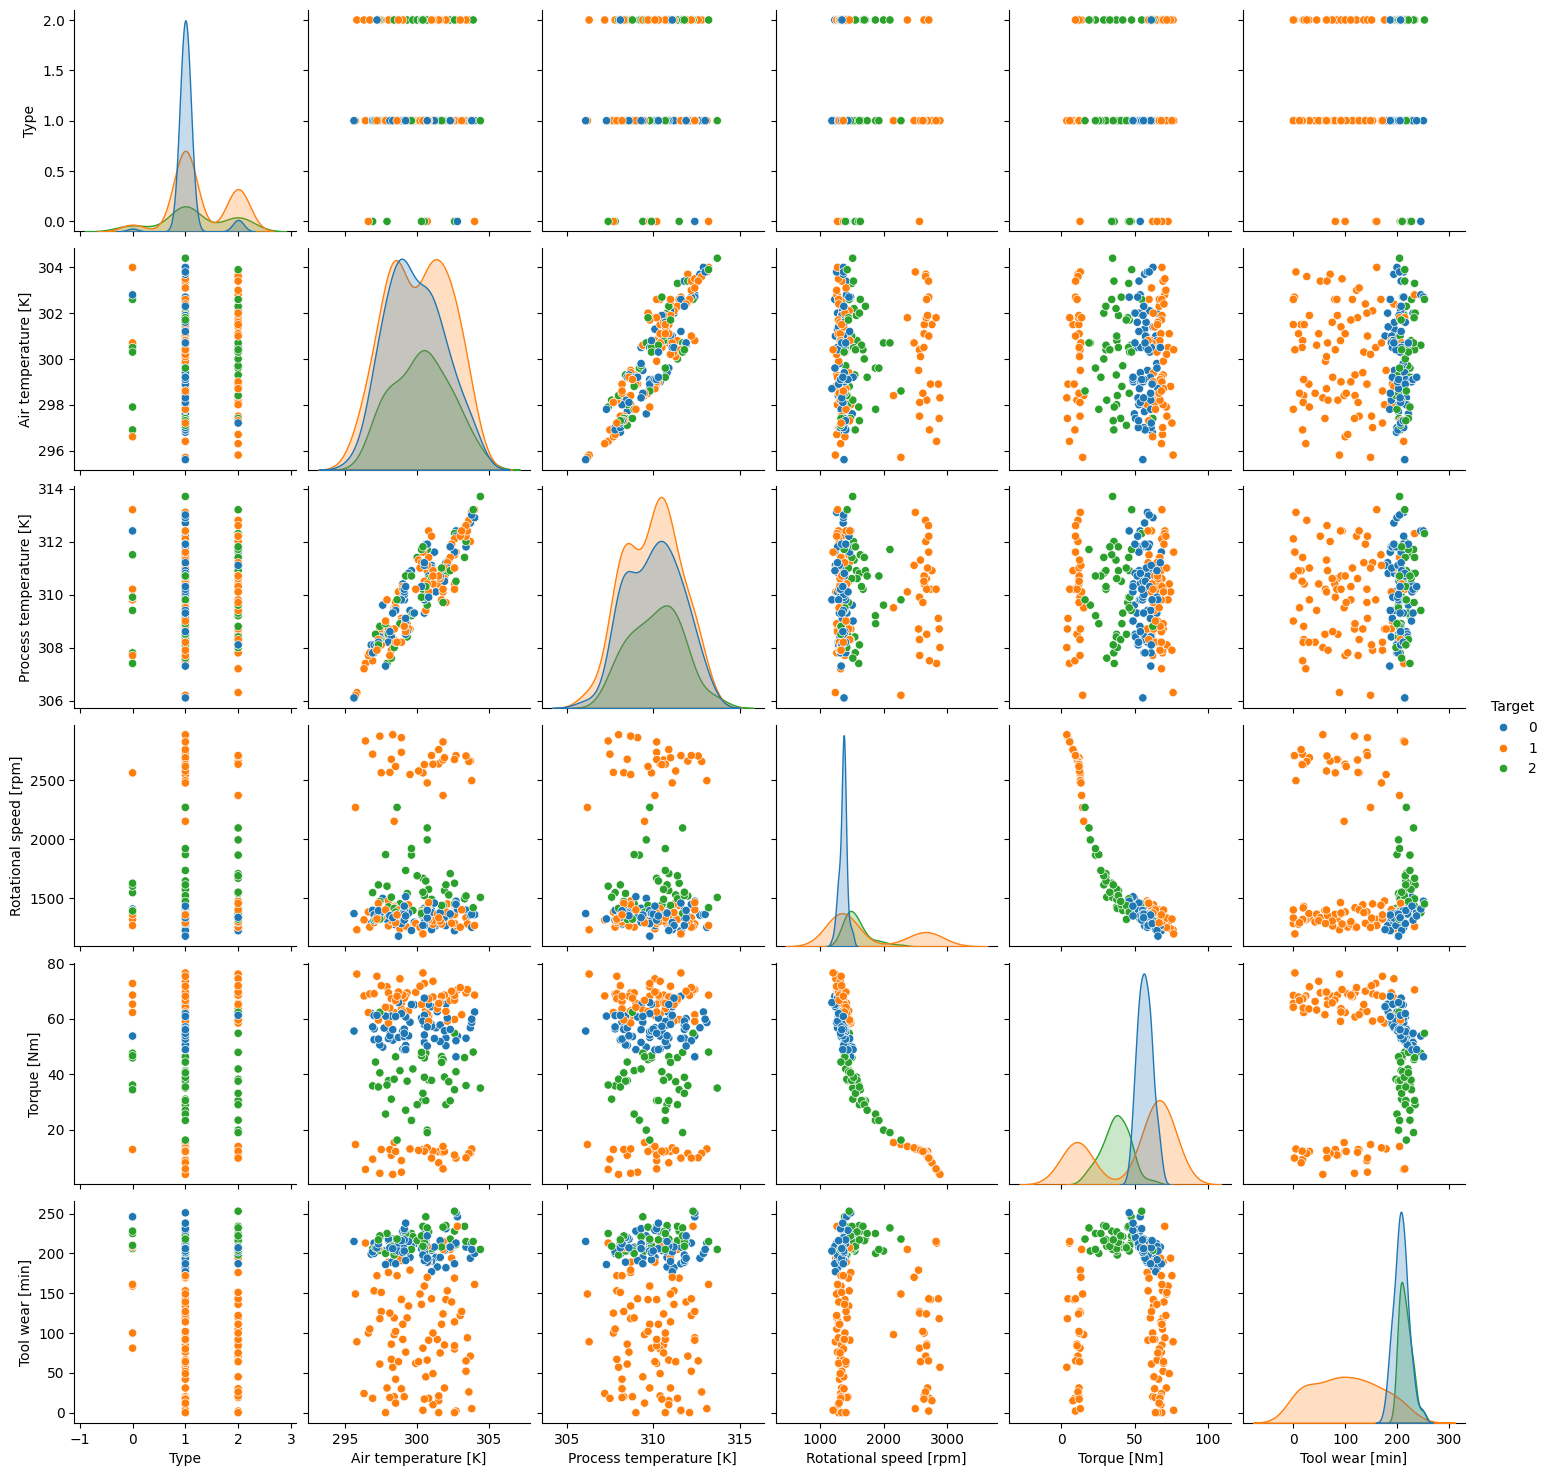

In [14]:
filtered_df = pd.DataFrame(X, index=df_2cls.index)
filtered_df['Target'] = y
sns.pairplot(filtered_df,hue='Target', palette=sns.color_palette())
plt.show()

## Поиск наилучшей пары признаков

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import accuracy_score
from itertools import combinations


In [16]:
classifiers = [LinearDiscriminantAnalysis(solver="svd"), SVC(kernel='poly', degree=2), GaussianNB()]

Функция обучения классификаторов и тестирование по метрике accuracy

In [17]:
def test_class(x_train, x_test, y_train, y_test, classifiers, use_cvs=False, print_report=False):
    res=[]
    # iterate over classifiers

    for clf in classifiers:
        
        # Choosing cross validate or not
        if use_cvs:
            cv_data = cross_validate(clf, x_train, y_train, cv=5, scoring='accuracy', return_estimator=True)
            best_acc_index = np.argmax(cv_data['test_score'])
            clf_acc = cv_data['test_score'][best_acc_index]
            model = cv_data['estimator'][best_acc_index]
            
        else:
            clf.fit(x_train, y_train)
            clf_pred = clf.predict(x_test)
            clf_acc = accuracy_score(y_test, clf_pred)
            model = clf

        res.append([model.__class__.__name__, clf_acc, model])
        
        # Printing classification report if needed
        if print_report:
            print(model.__class__.__name__)
            print(classification_report(y_test, clf_pred, target_names = classes, zero_division =0))
        
    res_df=pd.DataFrame(data=res,columns=['Classifier', 'Accuracy', 'Model'])

    return res_df

Поиск наилучшей пары признаков датасета на основании среднего accuacy среди рассматриваемых классификаторов 

In [18]:
def find_best_features(x_train, y_train, x_test, y_test, classifiers, print_results=False):
    best_score = 0
    best_features = None
    
    # Iterate over all possible pairs of features
    for feature_pair in combinations(x_train.columns, 2):
        print(feature_pair, end=" ")
        # Select the feature pair from the training and test data
        x_train_subset = x_train[list(feature_pair)].values
        x_test_subset = x_test[list(feature_pair)].values
        
        test_results = test_class(x_train_subset, x_test_subset, y_train, y_test, classifiers)
        avg_score = sum(test_results['Accuracy']) / len(test_results['Accuracy'])
        print(f"with accuracy: {avg_score}") if print_results else print()

        # Update the best score and feature pair if the current average score is higher
        if avg_score > best_score:
            best_score = avg_score
            best_features = feature_pair

    
    print(f"Best Average Accuracy Score: {best_score:.4f} with features: {best_features}")
    return best_features


In [19]:
best_features = find_best_features(X_train, y_train, X_test, y_test, classifiers, print_results=True)

('Type', 'Air temperature [K]') with accuracy: 0.494949494949495
('Type', 'Process temperature [K]') with accuracy: 0.5
('Type', 'Rotational speed [rpm]') with accuracy: 0.6161616161616162
('Type', 'Torque [Nm]') with accuracy: 0.5858585858585859
('Type', 'Tool wear [min]') with accuracy: 0.7323232323232323
('Air temperature [K]', 'Process temperature [K]') with accuracy: 0.4545454545454546
('Air temperature [K]', 'Rotational speed [rpm]') with accuracy: 0.5252525252525252
('Air temperature [K]', 'Torque [Nm]') with accuracy: 0.5252525252525252
('Air temperature [K]', 'Tool wear [min]') with accuracy: 0.6717171717171717
('Process temperature [K]', 'Rotational speed [rpm]') with accuracy: 0.5252525252525252
('Process temperature [K]', 'Torque [Nm]') with accuracy: 0.5353535353535354
('Process temperature [K]', 'Tool wear [min]') with accuracy: 0.7070707070707071
('Rotational speed [rpm]', 'Torque [Nm]') with accuracy: 0.7777777777777778
('Rotational speed [rpm]', 'Tool wear [min]') with

## Построение двух новых признаков на основании двух лучших ранее найденных признаков с помощью LinearDiscriminantAnalysis

In [20]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
X_lda = lda.transform(X)

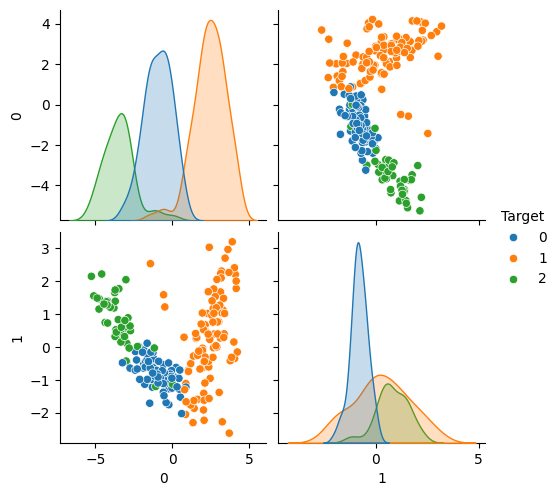

In [21]:
lda_df=pd.DataFrame(X_lda, index=df_2cls.index)
lda_df['Target'] = y
sns.pairplot(lda_df,hue='Target', palette=sns.color_palette())
plt.show()

Сравнение оценки классификаторов до и после преобразования признаков

In [22]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.3, random_state=3)
lda_scaler = StandardScaler()
X_train_lda = pd.DataFrame(lda_scaler.fit_transform(X_train_lda), columns=best_features)
X_test_lda = pd.DataFrame(lda_scaler.fit_transform(X_test_lda), columns=best_features)

In [23]:
best_features_results = test_class(X_train[list(best_features)], X_test[list(best_features)], y_train, y_test, classifiers)
best_features_results

,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,0.878788,LinearDiscriminantAnalysis()
1,SVC,0.772727,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.924242,GaussianNB()


In [24]:
lda_transform_results = test_class(X_train_lda, X_test_lda, y_train_lda, y_test_lda, classifiers)
lda_transform_results

,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,0.954545,LinearDiscriminantAnalysis()
1,SVC,0.757576,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.954545,GaussianNB()


## Визуализации разделяющей границы

Функция визуализации разделяющей границы для каждого классификатора

In [25]:
def draw_decision_boundary(x_test, y_test, models: list):
    # Encode labels if they're not already numerical
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_test)
    n_classes = len(le.classes_)
    
    # Define a colormap with as many colors as classes
    cmap_light = ListedColormap(plt.cm.get_cmap('Pastel1', n_classes).colors)
    cmap_bold = ListedColormap(plt.cm.get_cmap('Set1', n_classes).colors)

    # Define plot boundaries
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

    # Step size for grid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 250),
        np.linspace(y_min, y_max, 250)
    )

    # Setup subplots
    fig, axs = plt.subplots(1, len(models), figsize=(len(models) * 6, 5))
    if len(models) == 1:
        axs = [axs]

    for ax, model in zip(axs, models):
        # Predictions on mesh grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
            Z = Z.reshape(xx.shape)
        else:
            Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

        # Plot test points
        scatter = ax.scatter(
            x_test[:, 0], x_test[:, 1],
            c=y_encoded, cmap=cmap_bold,
            edgecolor='k', s=20
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f'Model: {type(model).__name__}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    # Create a single legend for all subplots
    handles, labels = scatter.legend_elements()
    legend_labels = le.inverse_transform(range(n_classes))
    fig.legend(handles, legend_labels, title="Classes", loc='upper right')
    
    plt.tight_layout()
    plt.show()

Визуализация до преобразования

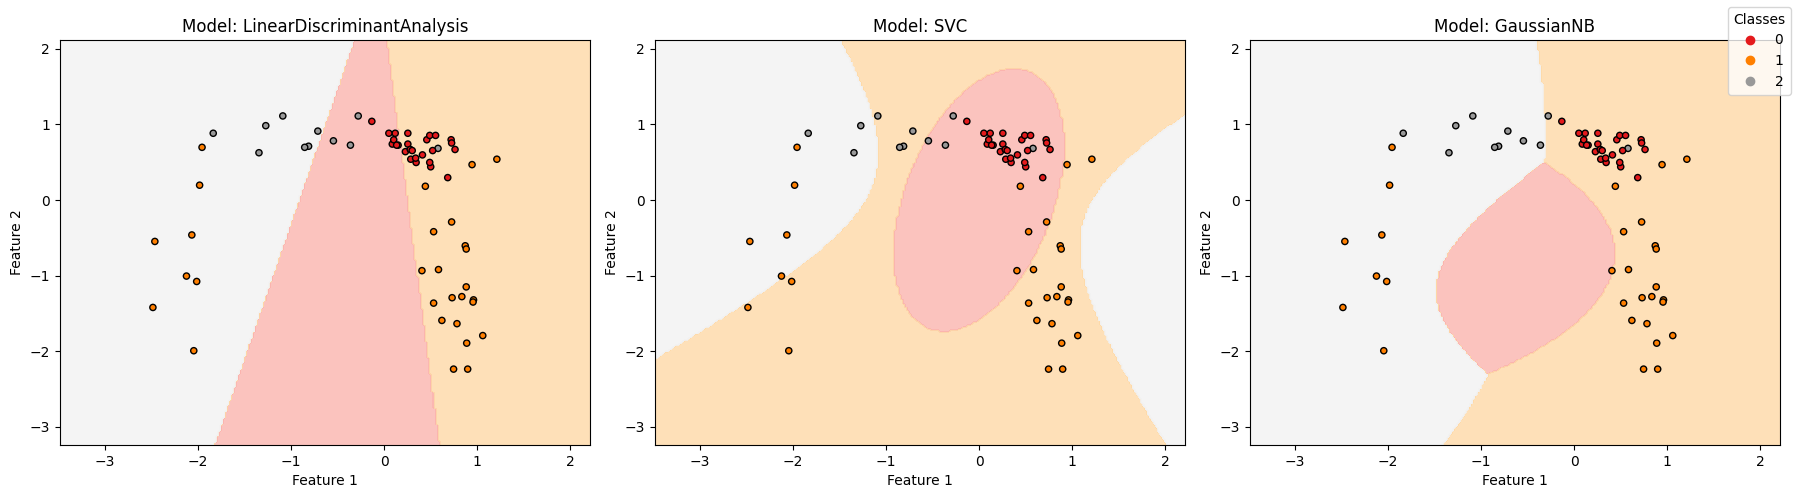

In [26]:
draw_decision_boundary(X_test[list(best_features)].values, y_test, best_features_results['Model'])

ВИзуализация после преобразования

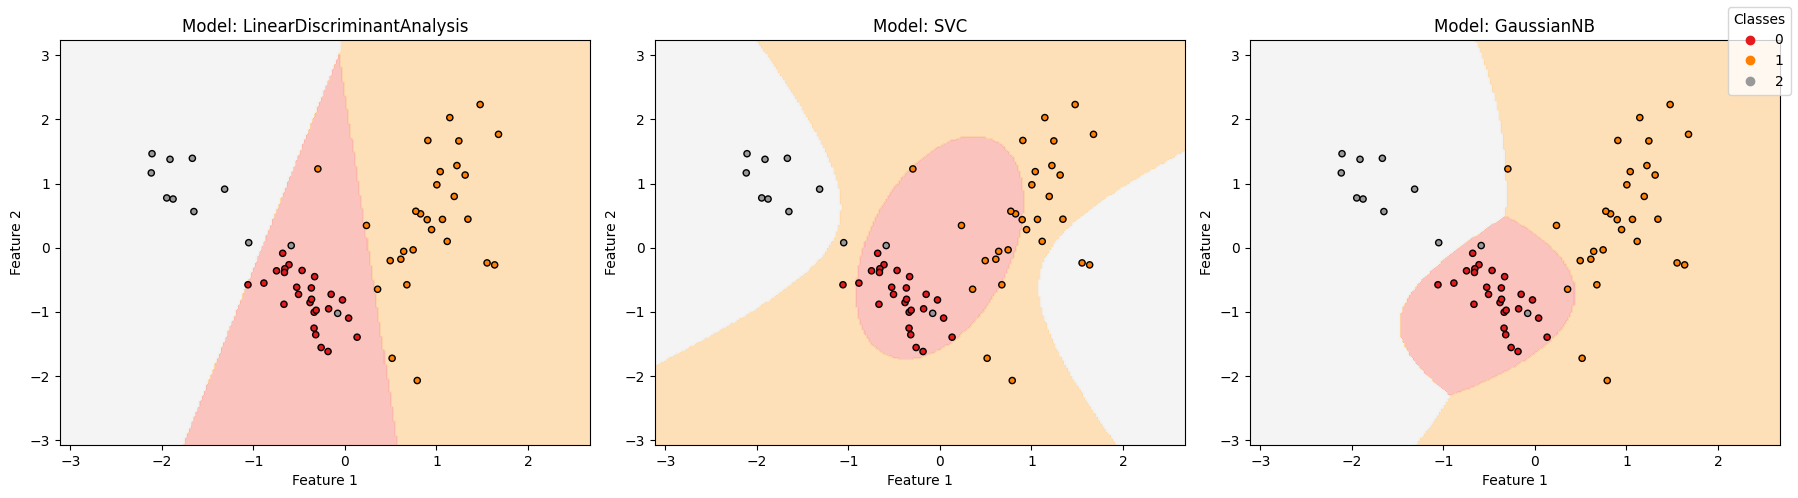

In [27]:
draw_decision_boundary(X_test_lda.values, y_test, lda_transform_results['Model'])

In [28]:
cv_best_features_results = test_class(X_train[list(best_features)], X_test[list(best_features)], y_train, y_test, classifiers, use_cvs=True)
print("Results with cross validation:\n")
cv_best_features_results

Results with cross validation:



,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,0.900000,LinearDiscriminantAnalysis()
1,SVC,0.866667,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.933333,GaussianNB()


In [29]:
print("Results without cross validation:\n")
best_features_results

Results without cross validation:



,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,0.878788,LinearDiscriminantAnalysis()
1,SVC,0.772727,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.924242,GaussianNB()


In [30]:
cv_lda_transform_results = test_class(X_train_lda, X_test_lda, y_train_lda, y_test_lda, classifiers, use_cvs=True)
print("Results with cross validation:\n")
cv_lda_transform_results


Results with cross validation:



,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,1.000000,LinearDiscriminantAnalysis()
1,SVC,0.838710,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.967742,GaussianNB()


In [31]:
print("Results without cross validation:\n")
lda_transform_results

Results without cross validation:



,Classifier,Accuracy,Model
0,LinearDiscriminantAnalysis,0.954545,LinearDiscriminantAnalysis()
1,SVC,0.757576,"SVC(degree=2, kernel='poly')"
2,GaussianNB,0.954545,GaussianNB()


## Вывод
В ходе исследования определена следующая пара признаков с наилучшими показателями классификаторов по метрике accuracy: 'Torque [Nm]', 'Tool wear [min]'. Наилучшим классификатором для этой пары признаков оказался наивный Байес как до так и после кросс валидации.

Однако после применения преобразования этих признаков с помощью LinearDiscriminantAnalysis наилучшим классификатором стала линейная регрессия как до так и после кросс валидации. Данное преобразование устранило линейную неразделимость данных, что позволило линейной регрессии дать наилучший результат.

Стоит отметить, что кросс валидация для каждого класса в обоих случаях улучшила результат, что позволило достичь у линейной регрессии accuracy 1.0